<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality.csv')
print(data.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


In [ ]:
X = data.iloc[:, 0:11]
y = data.iloc[:, 11]

print(set(y))

{3, 4, 5, 6, 7, 8}


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y)
Y_encodered = encoder.transform(y)

print(Y_encodered)

Y = np_utils.to_categorical(Y_encodered)


[2 2 2 ... 3 2 3]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1279, 11)
(1279, 6)
(320, 11)
(320, 6)


In [ ]:
X_mean = np.mean(X_train, axis = 0)
X_std = np.std(X_train, axis = 0)

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.2, 
                                                  random_state = 777)


In [ ]:
np.random.seed(7)

model = Sequential()
model.add(Dense(64, input_shape=(11,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=200, 
                    batch_size=10,
                    validation_data = (X_test, y_test))


Train on 1023 samples, validate on 320 samples
Epoch 1/200
1023/1023 [==============================] - 2s 2ms/step - loss: 1.4341 - accuracy: 0.4633 - val_loss: 1.1748 - val_accuracy: 0.5375
Epoch 2/200
1023/1023 [==============================] - 0s 443us/step - loss: 1.1040 - accuracy: 0.5699 - val_loss: 1.0352 - val_accuracy: 0.5688
Epoch 3/200
1023/1023 [==============================] - 0s 463us/step - loss: 1.0085 - accuracy: 0.5992 - val_loss: 0.9903 - val_accuracy: 0.5750
Epoch 4/200
1023/1023 [==============================] - 0s 446us/step - loss: 0.9733 - accuracy: 0.6051 - val_loss: 0.9738 - val_accuracy: 0.5938
Epoch 5/200
1023/1023 [==============================] - 0s 448us/step - loss: 0.9462 - accuracy: 0.6158 - val_loss: 0.9652 - val_accuracy: 0.6062
Epoch 6/200
1023/1023 [==============================] - 0s 455us/step - loss: 0.9251 - accuracy: 0.6237 - val_loss: 0.9548 - val_accuracy: 0.5969
Epoch 7/200
1023/1023 [==============================] - 0s 438us/step - 

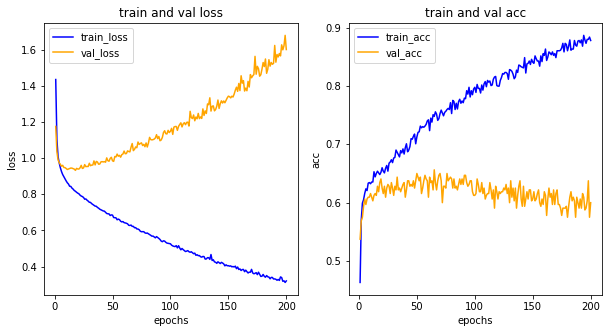

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()


In [ ]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


320/320 [==============================] - 0s 77us/step
accuracy: 60.00%
